In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv("breast_cancer.csv")

# Analysing the data

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Text(0, 0.5, 'Count')

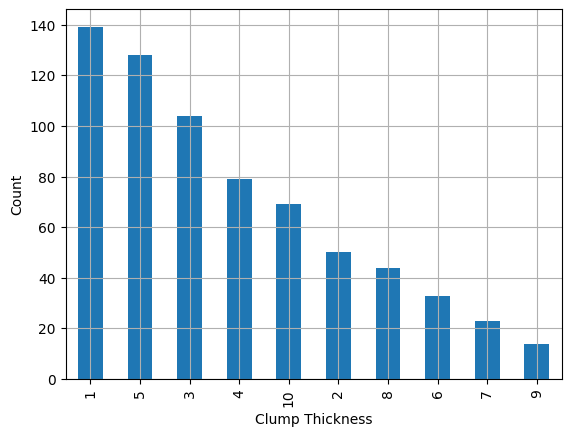

In [26]:
df["Clump Thickness"].value_counts().plot(kind = "bar")
plt.grid()
plt.ylabel("Count")

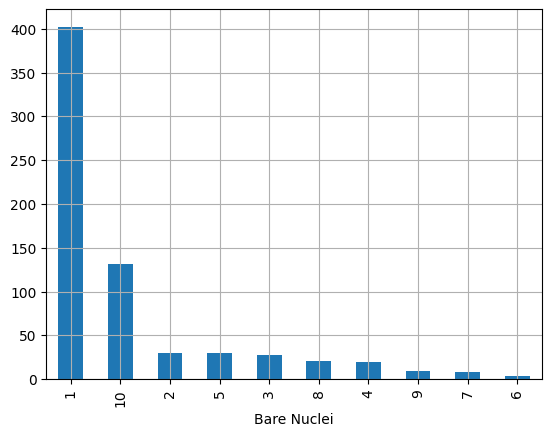

In [28]:
df["Bare Nuclei"].value_counts().plot(kind = "bar")
plt.grid()

AttributeError: 'numpy.ndarray' object has no attribute 'bar'

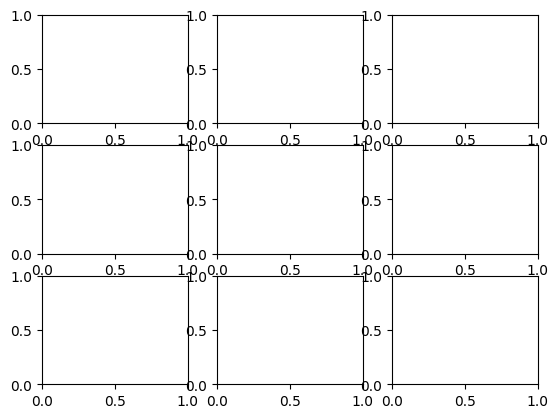

In [33]:
col_lst = list(df.columns)
rows, cols = 3, 3  # Adjust the layout based on the number of columns

fig, axes = plt.subplots(rows, cols, figsize=(6, 8))

for idx, col in enumerate(col_lst):
    axes[idx].bar(df.index, df[col])  # Use .bar() for bar plots
    axes[idx].grid()
    axes[idx].set_title(col)

plt.tight_layout()
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Data Preparation for Training

In [6]:
#creating the Vectors
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [7]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [8]:
#encoding the target variable for the xgboost model to be applied
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Building the XGBoost model for Classification

In [16]:
#training the xgboost model on the training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 50, n_jobs = -1)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
#predicting the test set results
y_pred = classifier.predict(x_test)

In [18]:
#Evaluating the model using the test set
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"This is the Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

This is the Confusion Matrix:
 [[103   4]
 [  4  60]]


In [19]:
print(f"This is the accuracy score: {accuracy_score(y_test, y_pred)*100}")

This is the accuracy score: 95.32163742690058


# K-fold Cross Validation

In [20]:
#performing the k-fold cross validation for testing the model on 10 different datasets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10, n_jobs=-1)
print(f"The mean accuracy of the 10 tests is: {accuracies.mean()*100}")

The mean accuracy of the 10 tests is: 96.87028657616892


In [21]:
print(f"The Standard Deviation of the 10 tests is: {accuracies.std()}")

The Standard Deviation of the 10 tests is: 0.023505348913272887
